In [1]:
import pandas as pd
df = pd.read_csv("kelulusan_mahasiswa.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IPK                10 non-null     float64
 1   Jumlah_Absensi     10 non-null     int64  
 2   Waktu_Belajar_Jam  10 non-null     int64  
 3   Lulus              10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 448.0 bytes
None
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus
0  3.8               3                 10      1
1  2.5               8                  5      0
2  3.4               4                  7      1
3  2.1              12                  2      0
4  3.9               2                 12      1


In [ ]:
print(df.isnull().sum())
df = df.drop_duplicates()

import seaborn as sns
sns.boxplot(x=df['IPK'])

IPK                  0
Jumlah_Absensi       0
Waktu_Belajar_Jam    0
Lulus                0
dtype: int64


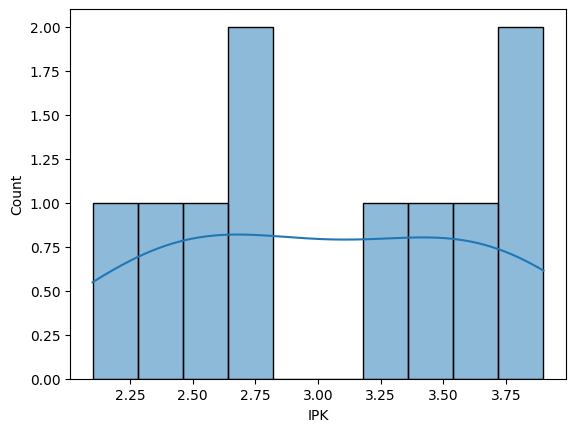

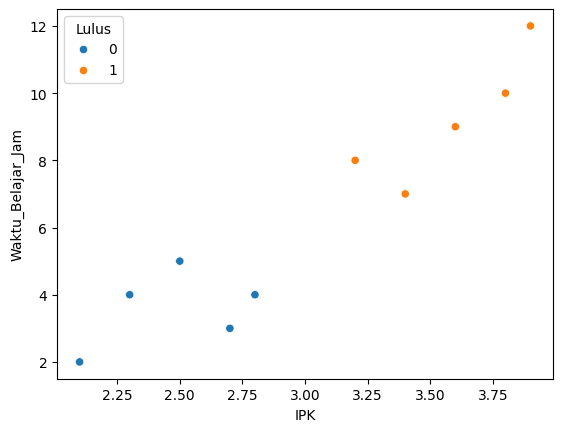

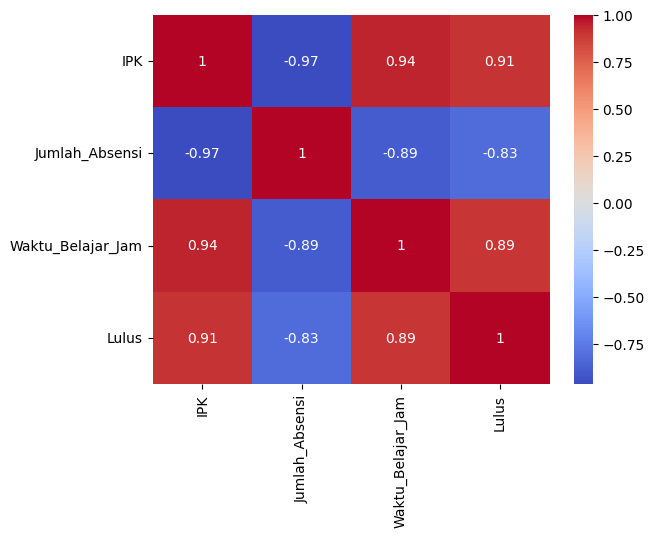

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
sns.histplot(df['IPK'], bins=10, kde=True)
plt.show()

# Scatterplot
sns.scatterplot(x='IPK', y='Waktu_Belajar_Jam', data=df, hue='Lulus')
plt.show()

# Heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [ ]:
df['Rasio_Absensi'] = df['Jumlah_Absensi'] / 14
df['IPK_x_Study'] = df['IPK'] * df['Waktu_Belajar_Jam']
df.to_csv("processed_kelulusan.csv", index=False)
df.head()

,IPK,Jumlah_Absensi,Waktu_Belajar_Jam,Lulus,Rasio_Absensi,IPK_x_Study
0,3.8,3,10,1,0.214286,38.0
1,2.5,8,5,0,0.571429,12.5
2,3.4,4,7,1,0.285714,23.8
3,2.1,12,2,0,0.857143,4.2
4,3.9,2,12,1,0.142857,46.8


In [6]:
from sklearn.model_selection import train_test_split

import pandas as pd
df = pd.read_csv("kelulusan_mahasiswa.csv")

X = df.drop('Lulus', axis=1)
y = df['Lulus']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(7, 3) (1, 3) (2, 3)
